### Implementing Polynomial Regression with Scikit-Learn

Scikit-Learn doesn't have a separate class for polynomial regression. Instead, it uses the <code>PolynomialFeatures</code> transformer to create polynomial features from the original features, and then applies a linear regression model to these transformed features.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
# Generate some sample data having a non-linear relationship

np.random.seed(23)
X = np.linspace(-5, 5, 100)  # evenly space array
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 3, 100)
# tip loc (mean), scale (st. deviation), size (size of array)
# INFO 1/2 X^2 + X + 2, quadratic eqn with noise
X = X.reshape(-1, 1)  # reshaping X as 2D
# INFO reshape array with (-1) = IDC how many rows but I only need 1 column

In [31]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=51
)

# Create polynomial features
degree_of_polynomial = 2
polynomial = PolynomialFeatures(degree=degree_of_polynomial)
X_train_poly = polynomial.fit_transform(X_train)  # transforming training data
X_test_poly = polynomial.fit_transform(X_test)  # transforming testing data
#INFO fit_transform() First, learn the feature mapping from training data, then create transformed features immediately

In [32]:
# train a Linear Regression on Polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# make prediction
y_pred = model.predict(X_test_poly)

# evaluate the model
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mean squared error: {mse} and r2 score: {r2} ")


mean squared error: 5.078637473901572 and r2 score: 0.7929613119922503 


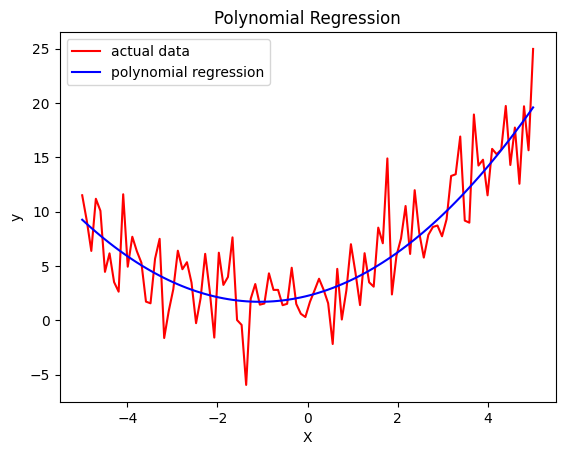

In [33]:
# plotting
X_plot = X # same thing
X_plot_poly = polynomial.transform(X) # adds non-linearity into the input features
#transform() INFO When you get new data (test set), don't fit again! Only transform using already learned rules.
# X is 2D, .transorm() adds columns as per the degree 
y_plot = model.predict(X_plot_poly)

plt.plot(X,y, color='red', label='actual data')
plt.plot(X_plot,y_plot, color='blue', label='polynomial regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()